# COVID-19 Analysis in Indonesia

This dataset was taken from Kaggel.com by fellow Indonesians Mr. Hendratno. Everyone in the world knows that this covid-19 is a Worldwide pandemic that bring changes to our society, especially on the sector economy or finance. For that reason, i This analysis made so other people can learn and understanding about this virus.

This is also my last course project for the course Data Analysis with Python: Zero to Pandas. And also i thank Jovian.ml for creating this course and people who help me in the forum forum when i asked question about this course.

## Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/hendratno/covid19-indonesia' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./covid19-indonesia" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './covid19-indonesia'

In [6]:
import os
os.listdir(data_dir)

['covid_19_indonesia_time_series_all.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-course-project-starter-covid19-indonesia" # change this (use lowercase letters and hyphens only)

In [2]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project='zerotopandas-course-project-starter-covid19-indonesia')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrchmdani/zerotopandas-course-project-starter-covid19-indonesia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia


'https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia'

## Data Preparation and Cleaning

Load dataset and explore the data.



In [11]:
import numpy as ny
import pandas as pd

In [12]:
covid19_indonesia_df = pd.read_csv('covid19-indonesia/covid_19_indonesia_time_series_all.csv')
covid19_indonesia_df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [13]:
df = covid19_indonesia_df.copy()

#### Changing format date

In [14]:
df['Date'] = pd.to_datetime(df.Date)
df['Date']

0       2020-03-01
1       2020-03-02
2       2020-03-02
3       2020-03-02
4       2020-03-03
           ...    
21754   2021-12-02
21755   2021-12-02
21756   2021-12-02
21757   2021-12-02
21758   2021-12-03
Name: Date, Length: 21759, dtype: datetime64[ns]

#### Need to clean some data for the next step, so some columns will be drop

In [15]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [16]:
df_drop = ['Location ISO Code', 'Location Level', 'City or Regency', 'Province', 'Country', 'Continent', 'Island', 
           'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities', 'Total Districts', 'Total Urban Villages', 
           'Total Rural Villages', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 
           'Total Deaths per Million', 'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate', 
           'Growth Factor of New Cases', 'Growth Factor of New Deaths']

In [17]:
df_mod = df.drop(columns = df_drop)

In [18]:
df_mod.columns

Index(['Date', 'Location', 'New Cases', 'New Deaths', 'New Recovered',
       'New Active Cases', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Total Active Cases', 'Area (km2)', 'Population', 'Population Density',
       'Longitude', 'Latitude'],
      dtype='object')

#### cleaning some data

In [19]:
# for Indonesia plot 
df_mod_ina = df_mod[df_mod.Location == 'Indonesia'] 
df_mod_ina = df_mod_ina.drop(columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases','Location', 'Longitude', 'Latitude'])
df_mod_ina

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density
2,2020-03-02,2,0,0,2,1916907,265185520,138.34
5,2020-03-03,0,0,0,0,1916907,265185520,138.34
9,2020-03-04,0,0,0,0,1916907,265185520,138.34
13,2020-03-05,0,0,0,0,1916907,265185520,138.34
18,2020-03-06,2,0,0,2,1916907,265185520,138.34
...,...,...,...,...,...,...,...,...
21637,2021-11-29,176,11,419,-254,1916907,265185520,138.34
21670,2021-11-30,297,11,324,-38,1916907,265185520,138.34
21703,2021-12-01,278,10,307,-39,1916907,265185520,138.34
21735,2021-12-02,311,10,388,-87,1916907,265185520,138.34


In [20]:
#for province plot
df_mod_province = df_mod[df_mod.Location != 'Indonesia'].drop_duplicates(subset='Location', keep = 'last')
df_mod_province

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Population Density,Longitude,Latitude
21364,2021-11-21,Gorontalo,1,0,0,1,11834,460,11374,0,11257,1180651,104.88,122.376058,0.687003
21617,2021-11-28,Maluku Utara,2,0,3,-1,12101,303,11757,41,31983,1307803,40.89,127.539107,0.212037
21700,2021-12-01,Bengkulu,1,0,0,1,23104,473,22612,19,19919,1999539,100.38,102.338421,-3.533584
21712,2021-12-01,Kalimantan Utara,1,0,0,1,35885,811,35039,35,75468,648407,8.59,116.218879,2.891013
21714,2021-12-01,Kepulauan Riau,2,0,0,2,53884,1748,52120,16,8202,1929400,235.24,108.261746,3.916346
21716,2021-12-01,Maluku,1,0,0,1,14587,261,14310,16,46914,1847097,39.37,129.576792,-3.192572
21722,2021-12-01,Sulawesi Barat,1,0,0,1,12353,346,12001,6,16787,1559984,92.93,119.345019,-2.461746
21730,2021-12-02,Aceh,2,0,0,2,38416,2066,36333,17,57956,5247257,90.54,96.910522,4.225615
21731,2021-12-02,Bali,15,1,1,13,114233,4046,110003,184,5780,4216171,729.43,115.131714,-8.369472
21732,2021-12-02,Banten,16,0,1,15,132693,2688,129872,133,9663,10722374,1109.64,106.109004,-6.456736


In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrchmdani/zerotopandas-course-project-starter-covid19-indonesia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia


'https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia'

## Exploratory Analysis and Visualization

This is for analysis and visualization the data that we already prepare and cleaning.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
df_mod_ina.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density
count,642.000000,642.000000,642.000000,642.000000,642.0,642.0,6.420000e+02
mean,6631.219626,224.077882,6395.140187,12.001558,1916907.0,265185520.0,1.383400e+02
std,9556.018870,359.858505,9052.199569,4862.277290,0.0,0.0,2.161734e-12
min,0.000000,0.000000,0.000000,-25725.000000,1916907.0,265185520.0,1.383400e+02
25%,1044.250000,47.250000,889.750000,-619.750000,1916907.0,265185520.0,1.383400e+02
50%,4070.500000,112.000000,3855.000000,118.500000,1916907.0,265185520.0,1.383400e+02
75%,6737.750000,193.750000,6976.750000,639.750000,1916907.0,265185520.0,1.383400e+02
max,56757.000000,2069.000000,48832.000000,36726.000000,1916907.0,265185520.0,1.383400e+02


This is descriptive statistic that used for summerize the data distribution. From the table we can analyze the basic of the data for example average new cases in Indonesia, the highest recovery per day, and etc.

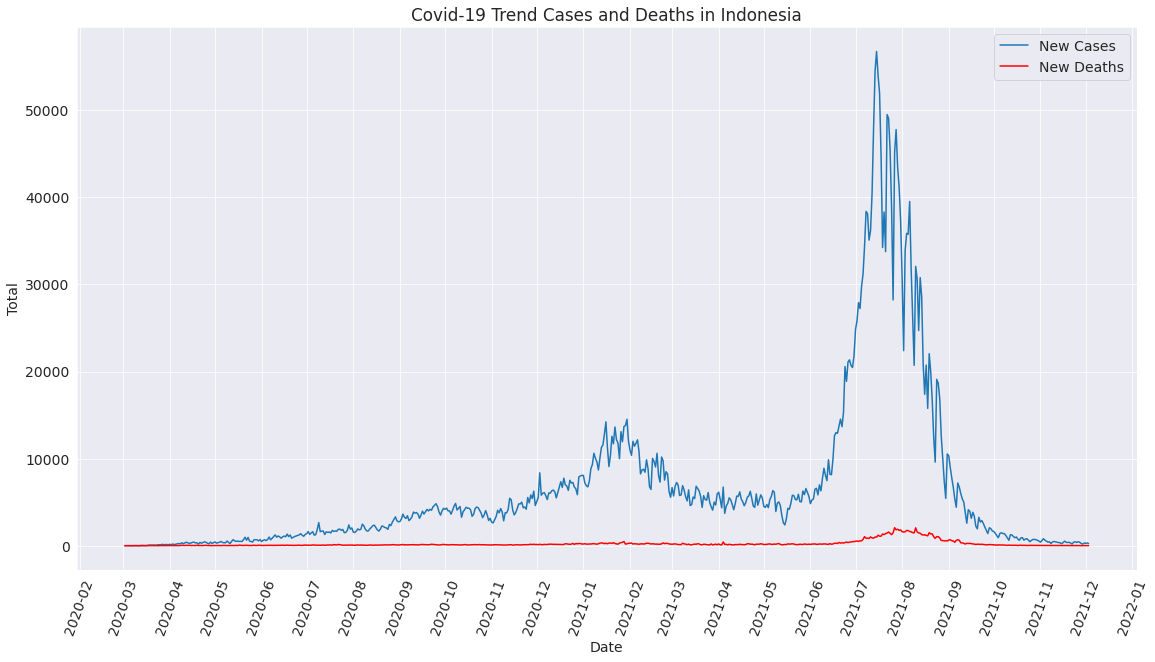

In [25]:
plt.figure(figsize= (19,10))
plt.xticks(rotation = 70)

x = df_mod_ina['Date']
y1 = df_mod_ina['New Cases']
y2 = df_mod_ina['New Deaths']
plt.plot(x,y1, label='New Cases')
plt.plot(x,y2, label='New Deaths', color='r')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Covid-19 Trend Cases and Deaths in Indonesia')

plt.legend()
plt.show()

We can see from the graph that we have steady increase on covid-19 new cases with two virus outbreak. The first case happen after the New Year 2021 and the second on June through August because people already bored at home and need holiday or recreation. The death number also increase on second outbreak and hospital already full because of it.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

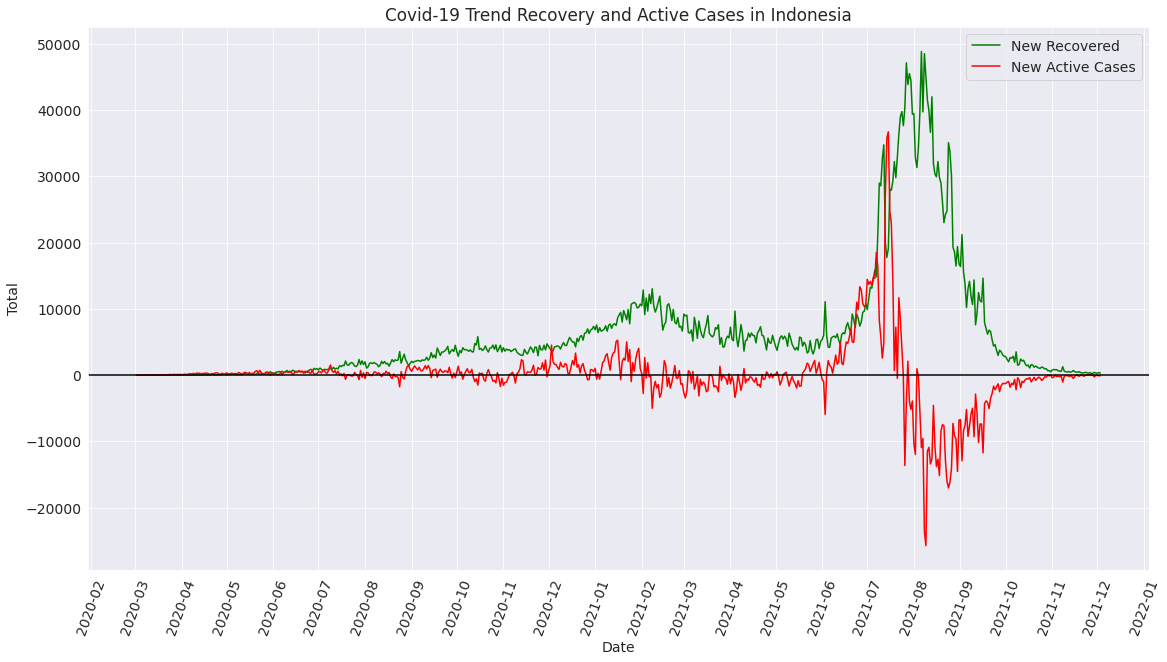

In [26]:
plt.figure(figsize= (19,10))
plt.xticks(rotation = 70)

x = df_mod_ina['Date']
y1 = df_mod_ina['New Recovered']
y2 = df_mod_ina['New Active Cases']
plt.plot(x,y1, label='New Recovered', color='g')
plt.plot(x,y2, label='New Active Cases', color='r')


plt.axhline(y=0.5, color='black', linestyle='-')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Covid-19 Trend Recovery and Active Cases in Indonesia')

plt.legend()
plt.show()

Same case with Covid-19 Trend Cases and Deaths in Indonesia, this graph show how recovery rate after the outbrake. And for active cases, we have the the best reduction on active cases because our Health Ministry and goverment already have full control over covid-19.

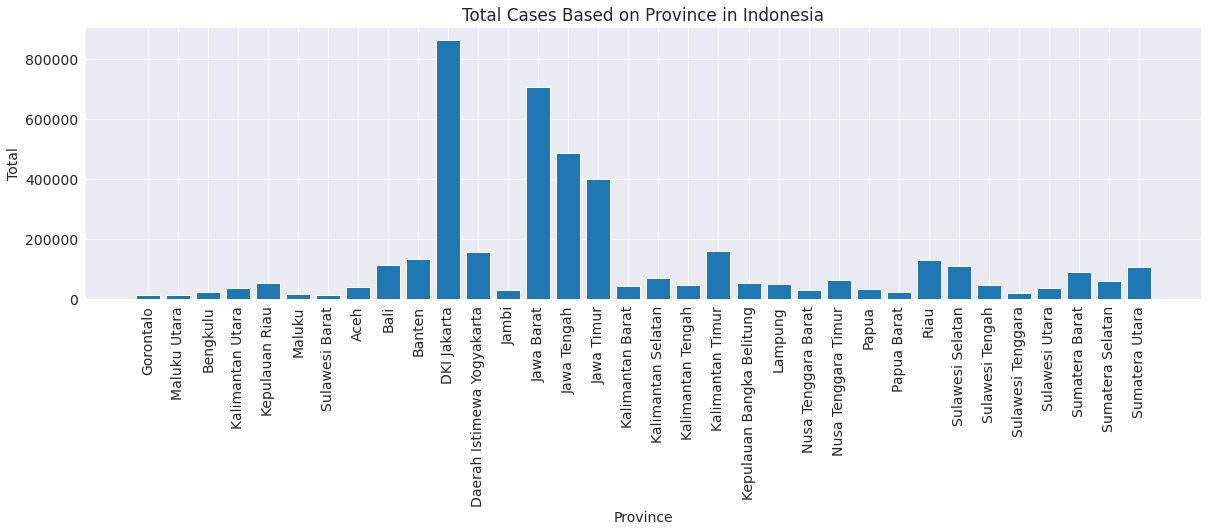

In [27]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(df_mod_province['Location'], df_mod_province['Total Cases'])

plt.xticks(rotation = 90)
    
plt.xlabel('Province')
plt.ylabel('Total')
plt.title('Total Cases Based on Province in Indonesia')

plt.show()

This bar show total cases per Province in Indonesia

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

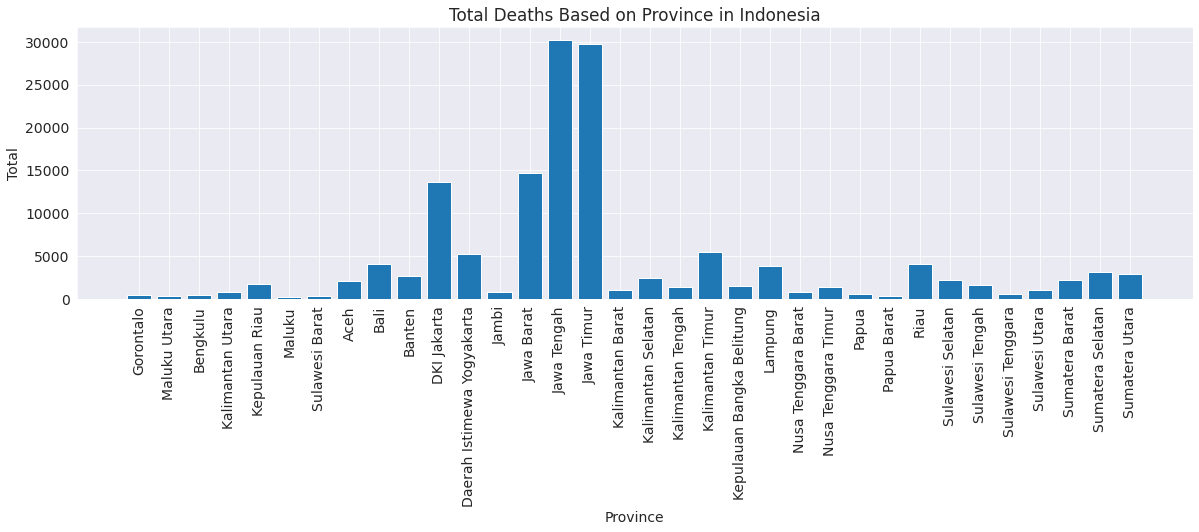

In [28]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(df_mod_province['Location'], df_mod_province['Total Deaths'])

plt.xticks(rotation = 90)
    
plt.xlabel('Province')
plt.ylabel('Total')
plt.title('Total Deaths Based on Province in Indonesia')

plt.show()

This bar show total deaths per Province in Indonesia

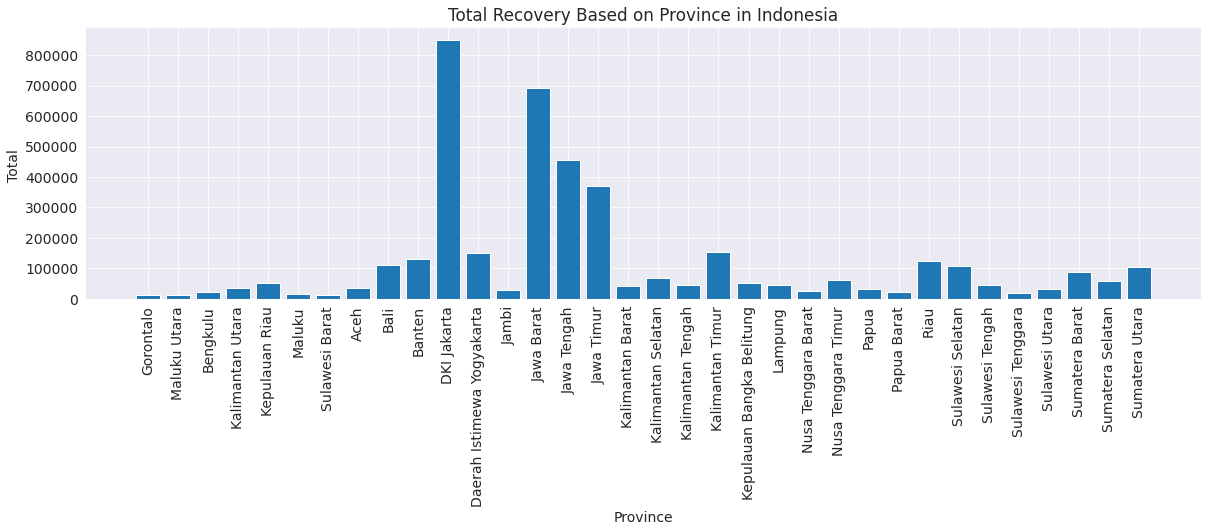

In [29]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(df_mod_province['Location'], df_mod_province['Total Recovered'])

plt.xticks(rotation = 90)
    
plt.xlabel('Province')
plt.ylabel('Total ')
plt.title('Total Recovery Based on Province in Indonesia')

plt.show()

This bar show total recovery per Province in Indonesia

Let us save and upload our work to Jovian before continuing

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrchmdani/zerotopandas-course-project-starter-covid19-indonesia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia


'https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia'

## Asking and Answering Questions



#### Q1: What is the total cases, total death, and total recovered in Indonesia and are there correlation between them?

In [32]:
df_mod_ina_sum = df_mod_ina.drop(columns = ['New Active Cases', 'Area (km2)', 'Population', 'Population Density'])
df_mod_ina_total = df_mod_ina_sum.sum(numeric_only=True, skipna = True)
df_mod_ina_total

New Cases        4257243
New Deaths        143858
New Recovered    4105680
dtype: int64

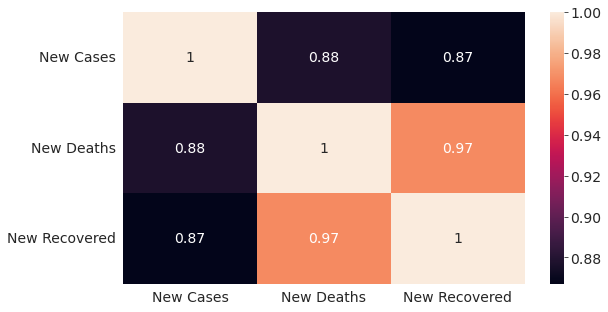

In [33]:
sns.heatmap(df_mod_ina_sum.corr(), annot=True)
plt.show()

About correlation regarding cases, death, and recovery, we can see that they have strong positive relationship because the score is 0,80+.

#### Q2: What is the highest trend cases of Covid-19 in Indonesia, and why that happen?

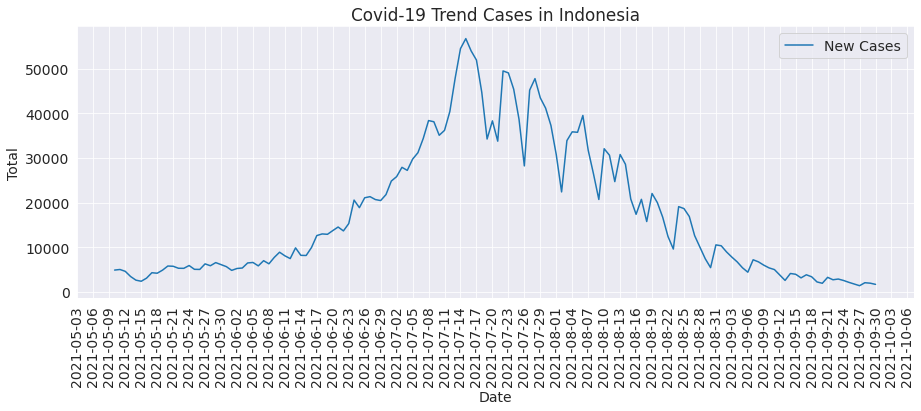

In [34]:
filtered_df_ina = df_mod_ina.loc[(df['Date'] >= '2021-05-10') & (df['Date'] < '2021-10-01')]

plt.figure(figsize= (15,5))
plt.xticks(rotation = 90)

x = filtered_df_ina['Date']
y = filtered_df_ina['New Cases']
plt.plot(x,y, label='New Cases')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Covid-19 Trend Cases in Indonesia')

plt.legend()
plt.show()

The highest trend total cases in this Country can be trace when Indonesian people already bored with activities at home and also we the biggest muslim religion in the world have holiday and it called 'Idul Fitri'. So, many of people goes to holiday visit their family. Another reason is because health protocols from goverment that are starting to be ignored (https://news.detik.com/berita/d-5617874/3-analisis-kemenkes-soal-penyebab-kasus-corona-meningkat-drastis/2).

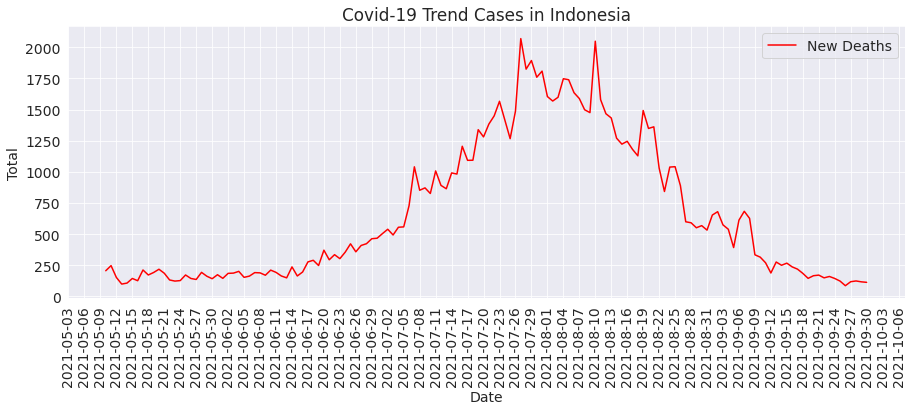

In [35]:
filtered_df_ina = df_mod_ina.loc[(df['Date'] >= '2021-05-10') & (df['Date'] < '2021-10-01')]

plt.figure(figsize= (15,5))
plt.xticks(rotation = 90)

x = filtered_df_ina['Date']
y = filtered_df_ina['New Deaths']
plt.plot(x,y, label='New Deaths', color='r')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Covid-19 Trend Cases in Indonesia')

plt.legend()
plt.show()

Increasing the total cases equal with the total death, the reason is the hospital cannot accomodate the room for the patient because to many people looking for the room. Another reason is because many of Indonesian people don't receive the vaccine for covid-19. (https://www.cnnindonesia.com/nasional/20210724224043-20-671819/pemerintah-sebut-penyebab-kenaikan-kasus-kematian-covid-19)

#### Q3: What are the highest province that have the highest cases in Indonesia

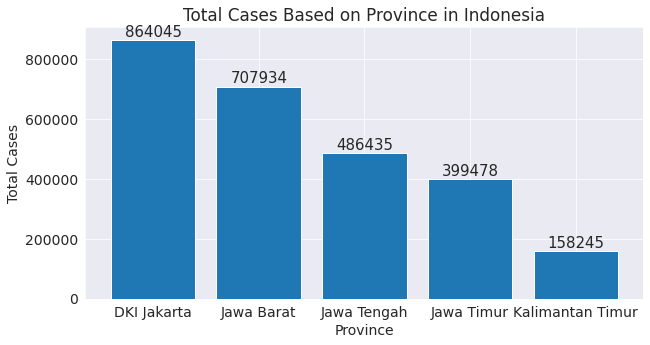

In [36]:
df_mod_province_tc = df_mod_province.sort_values(by=['Total Cases'], ascending=False)
df_mod_province_tc10 = df_mod_province_tc[0:5]

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(df_mod_province_tc10['Location'], df_mod_province_tc10['Total Cases'])

for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')

plt.xticks
    
plt.xlabel('Province')
plt.ylabel('Total Cases')
plt.title('Total Cases Based on Province in Indonesia')

plt.show()

#### Q4: What are the highest province that have the highest cases in Indonesia

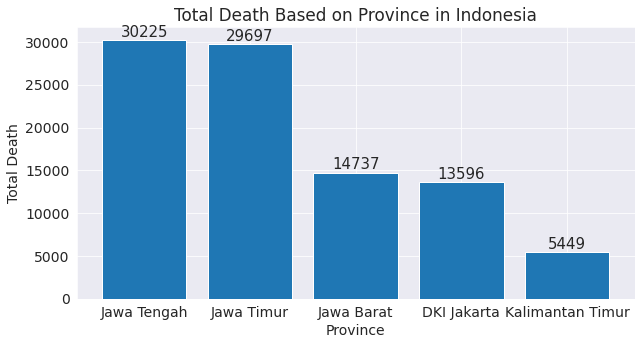

In [37]:
df_mod_province_td = df_mod_province.sort_values(by=['Total Deaths'], ascending=False)
df_mod_province_td10 = df_mod_province_td[0:5]

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(df_mod_province_td10['Location'], df_mod_province_td10['Total Deaths'])

for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')

plt.xticks
    
plt.xlabel('Province')
plt.ylabel('Total Death')
plt.title('Total Death Based on Province in Indonesia')

plt.show()

#### Q5: What are the highest province that have the highest recovered in Indonesia

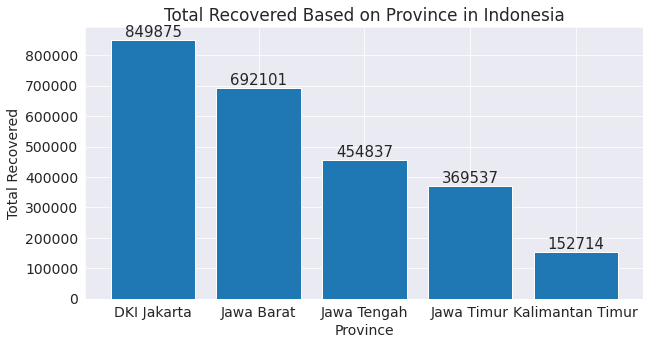

In [39]:
df_mod_province_tr = df_mod_province.sort_values(by=['Total Recovered'], ascending=False)
df_mod_province_tr10 = df_mod_province_tr[0:5]

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(df_mod_province_tr10['Location'], df_mod_province_tr10['Total Recovered'])

for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')

plt.xticks
    
plt.xlabel('Province')
plt.ylabel('Total Recovered')
plt.title('Total Recovered Based on Province in Indonesia')

plt.show()

Let us save and upload our work to Jovian before continuing.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrchmdani/zerotopandas-course-project-starter-covid19-indonesia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia


'https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia'

## Inferences and Conclusion


Conclusion from this dataset that taken from March 2020 to December 2021 is :

- There are total of 4,257,243 Cases, 143,858 death, and 4,105,680 recovery in Indonesia. That mean Goverment can control the spread of covid-19.
- The correlation between cases, death, and recovery have strong positive relationship. If we want to stop the covid, we can enforce the health protocol so the spread of covid-19 minimize.
- From March 2020 to December 2021 have two outbreak that cause by holiday and poor health protocol from Indonesian people. So in the future people must follow the goverment order to minimize or prevent the outbreak of covid-19.
- Total cases per province, Indonesia capital have the highest cases, followed by Java Province and Kalimantan Barat. This is normal because Jakarta is capital and the biggest city in Indonesia and the total death and recovery is good because the highest number of hospital. The problem is outside of capital, which mean in the future goverment must invest to build alot of hospital in the village.

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mrchmdani/zerotopandas-course-project-starter-covid19-indonesia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia


'https://jovian.ai/mrchmdani/zerotopandas-course-project-starter-covid19-indonesia'

## Future Work

My project of analyzing covid-19 in Indonesia currently still have alot of drawback in it. I hope other people also can try to combine this dataset with the number of hospital in Indonesia, it will be interesting if that happen. The information will be more usefull to provide better understanding about this World wide pandemic.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

## References

Numphy       : https://numpy.org/doc/stable/index.html

pandas       : https://pandas.pydata.org/docs/

Plotly       : https://plotly.com/python/getting-started/

Mathplot     : https://matplotlib.org/

Seaborn      : https://seaborn.pydata.org/

#### Open Dataset
Open dataset : https://www.kaggle.com/

#### Other References
Detik        : https://news.detik.com/berita/d-5617874/3-analisis-kemenkes-soal-penyebab-kasus-corona-meningkat-drastis/2

CNNIndonesia : https://www.cnnindonesia.com/nasional/20210724224043-20-671819/pemerintah-sebut-penyebab-kenaikan-kasus-kematian-covid-19

In [45]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>